In [1]:
from models.mtcnn import MTCNN
import torch, cv2, numpy as np
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt
from IPython import display

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Running on device: {}'.format(device))

Running on device: cpu


In [3]:
mtcnn = MTCNN(keep_all=True, device=device)

## Working with image

In [4]:
# Load an image
img = Image.fromarray(cv2.cvtColor(cv2.imread("input/humans-1024x616.png"), cv2.COLOR_BGR2RGB))

In [5]:
boxes, _ = mtcnn.detect(img)

frame_draw = img.copy()
draw = ImageDraw.Draw(frame_draw)
for box in boxes:
    draw.rectangle(box.tolist(), outline=(255, 0, 0), width=3)
img = frame_draw.resize((640, 360), Image.BILINEAR)

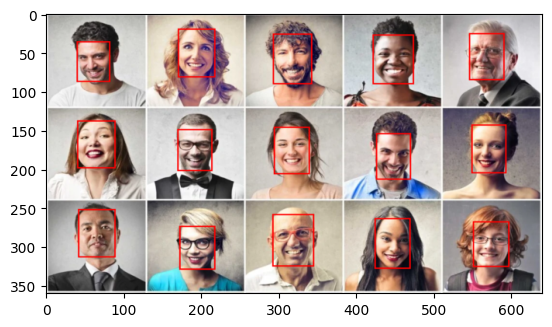

In [6]:
plt.imshow(img)
plt.show()

## Working with video

In [7]:
display.Video('input/video.mp4', width=640)

In [8]:
cap = cv2.VideoCapture('input/video.mp4')
 
#draw stuff that goes on every frame here
frames_tracked = []
videodims = (640, 360)
while cap.isOpened():
    ret, frame = cap.read()
 
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    img = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    
    boxes, _ = mtcnn.detect(img)
    frame_draw = img.copy()
    draw = ImageDraw.Draw(frame_draw)
    for box in boxes:
        draw.rectangle(box.tolist(), outline=(255, 0, 0), width=3)
    open_cv_image = np.array(frame_draw.resize(videodims, Image.BILINEAR).copy())
    frames_tracked.append(frame_draw.resize(videodims, Image.BILINEAR))
 

Can't receive frame (stream end?). Exiting ...


In [9]:
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
video = cv2.VideoWriter("output/tracked_video.mp4",fourcc, 25, videodims)
for i in range(len(frames_tracked)):
    video.write(cv2.cvtColor(np.array(frames_tracked[i]), cv2.COLOR_RGB2BGR))
video.release()


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


## Working with streaming video

In [10]:
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open camera")
    exit()

2024-12-09 23:53:12.027 Python[92539:20534328] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.


In [ ]:
videodims = (640, 360)

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
 
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    img = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    
    boxes, _ = mtcnn.detect(img)
    frame_draw = img.copy()
    draw = ImageDraw.Draw(frame_draw)
    try:
        
        for box in boxes:
            draw.rectangle(box.tolist(), outline=(255, 0, 0), width=3)
        open_cv_image = np.array(frame_draw.resize(videodims, Image.BILINEAR).copy())
        
        cv2.imshow('frame',open_cv_image[:, :, ::-1])
        if cv2.waitKey(1) == ord('q'):
            break
    except Exception:
        open_cv_image = np.array(frame_draw.resize(videodims, Image.BILINEAR).copy())
        cv2.imshow('frame',open_cv_image[:, :, ::-1])
        if cv2.waitKey(1) == ord('q'):
            break
        continue

cap.release()
cv2.destroyAllWindows()